In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import chardet
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [139]:
# определяем кодировку 
with open('/Users/maria/Documents/Практика ЦОАиП/scud_user_staff.csv', 'rb') as f: 
    result = chardet.detect(f.read(10000))  # Читаем часть файла для анализа 
    encoding = result['encoding'] 
    print(f"Detected encoding: {encoding}") 
 
# читаем файл с определенной кодировкой 
user_staff = pd.read_csv('/Users/maria/Documents/Практика ЦОАиП/scud_user_staff.csv', encoding=encoding,sep=';')
user_staff

Detected encoding: windows-1251


,user_id,hiring_date,tabel_number,is_dismissed,dismissed_date,work_schedule_id,viber_id,telegram_chat_id
0,1,2020-03-11,0001,0,NaN,0,NaN,0
1,110,2006-12-12,NaN,0,NaN,1,NaN,0
2,116,2006-12-12,NaN,0,NaN,1,NaN,0
3,117,2006-12-12,0409610,0,NaN,3798453,NaN,0
4,121,2006-12-12,0407423,0,NaN,3798453,NaN,0
...,...,...,...,...,...,...,...,...
29964,5372048,2024-04-01,0426023,0,NaN,3798453,NaN,0
29965,5372049,2024-04-01,0426024,0,NaN,3798453,NaN,0
29966,5372052,2024-04-01,2400229,0,NaN,3798454,NaN,0
29967,5372053,2024-04-01,2400224,0,NaN,3798454,NaN,0


# Признаки из СКУДа

In [141]:
scud_features_agregated = pd.read_csv('/Users/maria/Documents/Практика ЦОАиП/scud_features_agregated.csv')
scud_features_agregated

,user_id,year,semester,cnt_entries,inside_time_hours,first_enter,last_enter,even_entries,max_minutes_inside,max_minutes_outside,min_minutes_inside,min_minutes_outside,sum_minutes_inside,sum_minutes_outside,avg_minutes_inside,avg_minutes_outside,median_minutes_inside,median_minutes_outside,avg_weighted_minutes_inside,avg_weighted_minutes_outside,more_1class,more_2class,more_3class,more_4class,month,cnt_entries_sum,inside_time_hours_sum,sum_minutes_inside_sum,sum_minutes_outside_sum,cnt_days
0,915632,2022,autumn,2.800000,2.200000,14.400000,17.400000,0.000000,161.400000,0.800000,117.200000,0.800000,162.200000,0.800000,139.300000,0.800000,139.300000,0.800000,160.696472,0.800000,0.800000,0.600000,0.000000,0.0,10.800000,14,11,811,4,5
1,915632,2023,spring,2.833333,1.666667,11.833333,14.083333,0.000000,105.750000,1.000000,95.750000,1.000000,130.083333,1.000000,100.750000,1.000000,100.750000,1.000000,102.784816,1.000000,0.666667,0.500000,0.000000,0.0,3.166667,34,20,1561,12,12
2,1495804,2022,spring,3.461538,1.230769,11.076923,13.153846,0.076923,55.307692,38.461538,31.153846,32.923077,70.307692,39.692308,40.748718,34.384615,36.923077,33.076923,50.299321,37.662587,0.230769,0.076923,0.076923,0.0,4.461538,45,16,914,516,13
3,1495804,2023,autumn,2.000000,1.222222,10.666667,12.555556,0.000000,106.666667,0.000000,106.666667,0.000000,106.666667,0.000000,106.666667,0.000000,106.666667,0.000000,106.666667,0.000000,0.666667,0.000000,0.000000,0.0,10.333333,18,11,960,0,9
4,1495804,2024,spring,2.000000,0.500000,11.000000,11.500000,0.000000,60.500000,0.000000,60.500000,0.000000,60.500000,0.000000,60.500000,0.000000,60.500000,0.000000,60.500000,0.000000,0.000000,0.000000,0.000000,0.0,2.500000,4,1,121,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7706,5346855,2023,autumn,2.000000,1.083333,13.333333,14.666667,0.000000,92.333333,0.000000,92.333333,0.000000,92.333333,0.000000,92.333333,0.000000,92.333333,0.000000,92.333333,0.000000,0.416667,0.083333,0.000000,0.0,10.916667,24,13,1108,0,12
7707,5346855,2024,autumn,3.000000,4.500000,11.500000,16.500000,0.000000,260.000000,11.000000,178.000000,11.000000,289.500000,11.000000,219.000000,11.000000,219.000000,11.000000,242.843972,11.000000,1.000000,1.000000,1.000000,0.0,1.000000,6,9,579,22,2
7708,5346855,2024,spring,2.000000,2.750000,10.500000,14.000000,0.000000,193.500000,0.000000,193.500000,0.000000,193.500000,0.000000,193.500000,0.000000,193.500000,0.000000,193.500000,0.000000,0.750000,0.750000,0.250000,0.0,2.500000,8,11,774,0,4
7709,5347784,2023,autumn,2.666667,2.000000,14.166667,16.833333,0.000000,131.000000,1.500000,104.166667,1.000000,152.166667,2.500000,115.500000,1.250000,111.333333,1.250000,122.519192,1.300000,0.666667,0.333333,0.166667,0.0,10.000000,16,12,913,15,6


# Оценки 

In [142]:
marks = pd.read_csv('avg_mark_per_semester_ld_fac_group.csv').drop(['Unnamed: 0'], axis = 1)

marks['year'] = marks['date'].apply(lambda x: str(x).split('-')[0])
marks['semester'] = marks['date'].apply(lambda x: 'autumn' if int(str(x).split('-')[1]) in [9, 10, 11, 12, 1] else 'spring')  # spring остается [2, 3, 4, 5, 6, 7, 8]

marks

,uuid,date,marks_final,mark_average,ld_number,faculty,group,year,semester
0,00bcd658-be72-55ce-a55d-922033d24e8d,2020-12-01,34.0,4.25,2009500,Экономика,БЭК-20-1,2020,autumn
1,00bcd658-be72-55ce-a55d-922033d24e8d,2021-06-01,34.0,3.78,2009500,Экономика,БЭК-20-1,2021,spring
2,00bcd658-be72-55ce-a55d-922033d24e8d,2021-12-01,33.0,3.30,2009500,Экономика,БЭК-20-1,2021,autumn
3,00bcd658-be72-55ce-a55d-922033d24e8d,2022-06-01,30.0,3.33,2009500,Экономика,БЭК-20-1,2022,spring
4,00bcd658-be72-55ce-a55d-922033d24e8d,2022-12-01,22.0,3.14,2009500,Экономика,БЭК-20-1,2022,autumn
...,...,...,...,...,...,...,...,...,...
8388,fffead4e-7f94-53eb-a040-7e98d7c78ef5,2021-12-01,32.0,4.57,2005141,Электроника и наноэлектроника,БЭН-20-1,2021,autumn
8389,fffead4e-7f94-53eb-a040-7e98d7c78ef5,2022-06-01,53.0,4.82,2005141,Электроника и наноэлектроника,БЭН-20-1,2022,spring
8390,fffead4e-7f94-53eb-a040-7e98d7c78ef5,2022-12-01,43.0,4.78,2005141,Электроника и наноэлектроника,БЭН-20-1,2022,autumn
8391,fffead4e-7f94-53eb-a040-7e98d7c78ef5,2023-06-01,38.0,4.75,2005141,Электроника и наноэлектроника,БЭН-20-1,2023,spring


# Данные при поступлении

In [143]:
stud_budget = pd.read_excel('stud_budget_19.xlsx')
stud_budget

,№п/п,Баллы ЕГЭ,Призер олимпиад,Средний балл по предметам,Источник финансирования,Номер ЛД,ФИО
0,1,NaN,Нет,NaN,NaN,2011456,Комилов Анвар Музаффар угли
1,2,NaN,Нет,NaN,NaN,2011464,Холмуродов Бехзод Фарход угли
2,3,NaN,Нет,NaN,NaN,2011599,Халимова Дилафруз Одиловна
3,4,NaN,Нет,NaN,NaN,2011612,Шамурадов Истамжон Рашидович
4,5,NaN,Нет,NaN,Бюджетная основа,117777,Статыгин Василий Янович
...,...,...,...,...,...,...,...
34507,34508,100.0,Да,NaN,Бюджетная основа,2314000,Куровцев Антон Владимирович
34508,34509,100.0,Да,NaN,Полное возмещение затрат,1705991,Бурдыкин Александр Александрович
34509,34510,100.0,Да,NaN,Полное возмещение затрат,2105131,Абрамова Ксения Евгеньевна
34510,34511,100.0,Да,NaN,Полное возмещение затрат,2211177,Карагодин Илья Сергеевич


In [144]:
stud_budget = stud_budget[['Баллы ЕГЭ','Номер ЛД']].groupby('Номер ЛД', as_index = False).mean().merge(stud_budget[['Призер олимпиад', 'Источник финансирования', 'Номер ЛД']].drop_duplicates(), on = 'Номер ЛД')
stud_budget['Номер ЛД'] = stud_budget['Номер ЛД'].str.extract('(\d+)').astype(int)
stud_budget

,Номер ЛД,Баллы ЕГЭ,Призер олимпиад,Источник финансирования
0,30420,NaN,Нет,Полное возмещение затрат
1,50393,NaN,Нет,Полное возмещение затрат
2,60531,NaN,Нет,Полное возмещение затрат
3,68049,NaN,Нет,Полное возмещение затрат
4,70272,NaN,Нет,Полное возмещение затрат
...,...,...,...,...
20513,2400551,NaN,Нет,Полное возмещение затрат
20514,2400552,NaN,Нет,Полное возмещение затрат
20515,2400554,NaN,Нет,Полное возмещение затрат
20516,2400555,NaN,Нет,Полное возмещение затрат


# Данные об оценках по предметам

In [145]:
students_subjects = pd.read_csv('students_subjects.csv')
students_subjects

,ld_number,semester,year,avg_arr_mark,avg_arr_final_mark,min_arr_final_mark,max_arr_final_mark,min_arr_mark,max_arr_mark,cnt_subjects
0,100255,autumn,2020,3.850678,4.116909,3.476677,4.980392,3.240418,4.641944,5
1,100255,spring,2021,4.100724,4.399481,3.476677,4.981563,3.240418,4.647059,5
2,100255,autumn,2021,3.993152,4.247554,3.476677,4.989437,3.240418,4.566901,7
3,100255,spring,2022,3.767122,3.904706,3.297436,4.380435,3.049296,4.354545,6
4,100255,autumn,2022,3.630833,3.700638,3.613546,3.861386,3.463671,3.893617,3
...,...,...,...,...,...,...,...,...,...,...
8388,2316446,autumn,2021,3.818694,3.942173,3.476677,4.971138,3.240418,4.630416,5
8389,2316446,spring,2022,3.558369,3.744025,2.000000,4.526042,2.000000,4.250000,8
8390,2316446,autumn,2022,3.765056,3.880934,3.234783,4.333333,3.000000,4.476190,9
8391,2316446,spring,2023,3.488510,3.443242,2.000000,4.318966,2.000000,4.475728,7


# Процент двоек за предыдущий семестр

In [146]:
dvoiki = pd.read_csv('DVOIKI.csv')
dvoiki

,ld_number,semester,year,dvoiki_percent
0,100255,spring,2021,0.00
1,100255,autumn,2021,0.00
2,100255,spring,2022,0.00
3,100255,autumn,2022,0.17
4,100255,spring,2023,0.33
...,...,...,...,...
7737,2316446,spring,2022,0.00
7738,2316446,autumn,2022,0.38
7739,2316446,spring,2023,0.33
7740,2316446,autumn,2023,0.29


# Данные о мудле, публикациях, гражданстве, льготах

In [147]:
moodle = pd.read_csv('/Users/maria/Documents/Практика ЦОАиП/Новые данные о студентах/mdl_courses_features.csv').drop(['fio'], axis = 1)
moodle.head(10)

,ld,num_courses,is_english,is_completed,year,semester
0,2010218,1,0,1,2022,autumn
1,2010218,1,0,1,2023,autumn
2,2010218,1,0,1,2022,spring
3,2010992,1,0,1,2022,spring
4,2006407,1,0,1,2023,spring
5,1909127,1,0,1,2020,autumn
6,2001130,1,0,1,2020,autumn
7,2001130,1,0,1,2021,autumn
8,2005634,2,0,1,2020,autumn
9,2005634,1,0,1,2021,autumn


In [148]:
moodle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ld            1833 non-null   int64 
 1   num_courses   1833 non-null   int64 
 2   is_english    1833 non-null   int64 
 3   is_completed  1833 non-null   int64 
 4   year          1833 non-null   int64 
 5   semester      1833 non-null   object
dtypes: int64(5), object(1)
memory usage: 86.1+ KB


In [149]:
work_public_country_features = pd.read_csv('/Users/maria/Documents/Практика ЦОАиП/Новые данные о студентах/work_public_country_features.csv')
work_public_country_features.head(10) # Пока не могу прикрепить, фио захешировано, а номера ЛД нет

,ФИО,is_publicated,Пол,is_dormitory,is_russian,lgota
0,0007ccb1-f725-5850-9968-f7fef0e274cc,0,Мужской,0,1,1
1,0009bfbf-0db6-52e7-9d51-74400fe9bb06,0,Мужской,0,1,0
2,000b065a-69cb-5936-9109-749fc06bf05c,0,Мужской,0,1,0
3,00108bc8-60c9-559d-a7ac-cf16a31185a5,0,Женский,0,1,0
4,0019b779-e6db-55e4-b431-96aa0f1593a6,0,Мужской,1,1,0
5,001f85f0-2b2e-5305-95b6-44e16f278a17,0,Мужской,0,1,1
6,00204ccb-14e5-5eb0-b0df-b7e80b685cff,0,Мужской,0,1,0
7,0027a464-3b81-52a0-b3f0-ab2df61be987,0,Мужской,0,1,1
8,002afd8d-f693-5a12-ace3-354e07817dad,0,Мужской,0,1,0
9,002b9aa8-3bbc-51d0-9caa-4c11b0f7c6fe,0,Мужской,1,1,0


In [150]:
test = user_staff[['user_id', 'tabel_number']].merge(scud_features_agregated, on = 'user_id')
test['tabel_number'] = test['tabel_number'].astype('int')
marks['year'] = marks['year'].astype('int')

merged = test.merge(marks[['marks_final', 'mark_average', 'year', 'semester', 'ld_number', 'faculty', 'group', 'uuid']].rename(columns = {'ld_number': 'tabel_number'}), on = ['tabel_number', 'year', 'semester'])
merged = merged.merge(students_subjects.rename(columns = {'ld_number': 'tabel_number'}), on = ['tabel_number', 'year', 'semester'])
merged = merged.merge(stud_budget.rename(columns = {'Номер ЛД': 'tabel_number'}), on = ['tabel_number'])
merged = merged.merge(dvoiki.rename(columns = {'ld_number': 'tabel_number'}), on = ['tabel_number', 'year', 'semester'], how = 'left')
merged = merged.merge(moodle.rename(columns = {'ld': 'tabel_number'}), on = ['tabel_number', 'year', 'semester'], how = 'left')
merged = merged.merge(work_public_country_features.rename(columns = {'ФИО': 'uuid'}), on = 'uuid', how = 'left')
merged

,user_id,tabel_number,year,semester,cnt_entries,inside_time_hours,first_enter,last_enter,even_entries,max_minutes_inside,max_minutes_outside,min_minutes_inside,min_minutes_outside,sum_minutes_inside,sum_minutes_outside,avg_minutes_inside,avg_minutes_outside,median_minutes_inside,median_minutes_outside,avg_weighted_minutes_inside,avg_weighted_minutes_outside,more_1class,more_2class,more_3class,more_4class,month,cnt_entries_sum,inside_time_hours_sum,sum_minutes_inside_sum,sum_minutes_outside_sum,cnt_days,marks_final,mark_average,faculty,group,uuid,avg_arr_mark,avg_arr_final_mark,min_arr_final_mark,max_arr_final_mark,min_arr_mark,max_arr_mark,cnt_subjects,Баллы ЕГЭ,Призер олимпиад,Источник финансирования,dvoiki_percent,num_courses,is_english,is_completed,is_publicated,Пол,is_dormitory,is_russian,lgota
0,2016218,1800643,2022,autumn,3.629630,2.370370,11.814815,14.629630,0.000000,121.629630,4.296296,84.407407,1.703704,160.518519,5.148148,101.157407,2.858025,99.666667,2.777778,113.322132,3.959708,0.740741,0.407407,0.111111,0.037037,10.000000,98,64,4334,139,27,28.0,2.80,Технологические машины и оборудование,БТМО-20-1,cb735e20-238b-536e-9fbb-f65c667e3e2a,3.740889,3.515302,2.583333,4.000000,2.571429,4.085714,10,NaN,Нет,Бюджетная основа,0.25,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0
1,2016218,1800643,2022,spring,4.055556,2.666667,11.888889,15.166667,0.000000,112.583333,16.750000,72.916667,2.833333,167.333333,18.194444,93.712963,9.825926,94.958333,9.944444,103.286469,16.298896,0.805556,0.416667,0.111111,0.055556,3.083333,146,96,6024,655,36,24.0,3.00,Технологические машины и оборудование,БТМО-20-1,cb735e20-238b-536e-9fbb-f65c667e3e2a,3.694071,3.822531,3.210526,4.928068,3.240418,4.320113,8,NaN,Нет,Бюджетная основа,0.00,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0
2,2016218,1800643,2023,autumn,3.823529,2.117647,11.705882,14.588235,0.058824,119.764706,15.294118,66.176471,1.588235,139.470588,22.117647,92.568627,7.725490,91.764706,6.294118,114.999429,12.275486,0.705882,0.235294,0.058824,0.058824,10.764706,65,36,2371,376,17,32.0,2.46,Технологические машины и оборудование,БТМО-20-1,cb735e20-238b-536e-9fbb-f65c667e3e2a,3.260530,3.106313,2.365854,3.783505,2.468750,4.168472,13,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0
3,2016218,1800643,2023,spring,3.777778,2.444444,11.555556,14.555556,0.000000,244.000000,17.444444,85.111111,0.777778,289.888889,22.777778,133.661111,7.777778,102.944444,5.111111,214.067574,14.464085,0.777778,0.222222,0.111111,0.111111,3.777778,34,22,2609,205,9,32.0,3.20,Технологические машины и оборудование,БТМО-20-1,cb735e20-238b-536e-9fbb-f65c667e3e2a,3.338577,3.324983,2.536585,4.322946,2.513514,4.209302,10,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0
4,2016330,1800308,2022,autumn,6.500000,1.166667,13.666667,15.666667,0.166667,56.166667,14.500000,4.833333,3.166667,79.666667,18.500000,26.277778,8.833333,19.166667,8.833333,48.105578,12.620024,0.333333,0.000000,0.000000,0.000000,11.166667,39,7,478,111,6,21.0,2.10,Технологические машины и оборудование,БТМО-20-1,f482b6b5-2ef3-5a10-83c7-1cbe30e698ec,3.678684,3.525368,2.583333,4.000000,2.571429,4.085714,10,NaN,Нет,Бюджетная основа,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,5325554,2300233,2023,autumn,3.510204,1.938776,12.612245,15.000000,0.000000,87.428571,20.285714,40.877551,14.183673,116.571429,24.591837,62.865646,17.074830,60.806122,16.755102,77.771537,18.820730,0.489796,0.285714,0.061224,0.000000,10.448980,172,95,5712,1205,49,18.0,2.25,Электроника и наноэлектроника,БЭН-20-1,3395e217-0cb6-5c39-ae5f-a75e964acacc,3.919133,3.594853,3.085714,4.058912,3.463671,4.395349,8,NaN,Нет,Бюджетная основа,0.38,NaN,NaN,NaN,1.0,Мужской,1.0,1.0,1.0
4609,5325554,2300233,2023,spring,2.500000,2.666667,12.000000,14.833333,0.166667,89.000000,73.500000,64.333333,

In [151]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4613 entries, 0 to 4612
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       4613 non-null   int64  
 1   tabel_number                  4613 non-null   int64  
 2   year                          4613 non-null   int64  
 3   semester                      4613 non-null   object 
 4   cnt_entries                   4613 non-null   float64
 5   inside_time_hours             4613 non-null   float64
 6   first_enter                   4613 non-null   float64
 7   last_enter                    4613 non-null   float64
 8   even_entries                  4613 non-null   float64
 9   max_minutes_inside            4613 non-null   float64
 10  max_minutes_outside           4613 non-null   float64
 11  min_minutes_inside            4613 non-null   float64
 12  min_minutes_outside           4613 non-null   float64
 13  sum

# Датасет

### Exponentially Weighted Moving Average, EWMA - чтобы последние оценки имели больший вес, чем более старые. Для этого можно использовать экспоненциальное сглаживание 
### Simple Moving Average (SMA): Это простое скользящее среднее, которое вычисляется как среднее значение определенного количества последних оценок.
### Weighted Moving Average (WMA): Это взвешенное скользящее среднее, где последние оценки имеют больший вес, чем более старые.
### Custom Weighted Average: Это метод, где веса задаются вручную в зависимости от временной важности данных.

SMA: Использует простое среднее значение последних window оценок.

WMA: Использует линейно возрастающие веса для последних window оценок.

Custom Weighted Average: Использует произвольные веса для последних нескольких оценок.


In [152]:
# Признаки все нужны + таргет mark_average

dataset = merged.copy()

# Сортировка

dataset['group'] = dataset['group'].apply(lambda x: x.split('_')[0])
dataset['group'] = dataset['group'].apply(lambda x: x[:-1] if x[-1].isalpha() else x)
dataset['group_number'] = dataset['group'].apply(lambda x: str(x.split('-')[-1])) # Номер группы, категориальная 
dataset['course'] = (dataset['year'] - 2020 + 1) - (dataset['semester'] == 'spring')
dataset['semester'] = (dataset['semester'] == 'autumn').astype('int') # 1 - autumn, 0 - spring. Нужно, чтобы autumn был раньше spring

dataset = dataset.sort_values(by = ['user_id', 'year', 'semester'])


# Средняя оценка за все предыдущие периоды 

def calculate_previous_avg_mark(group):
    return group['mark_average'].expanding().mean().shift(1)

dataset['previous_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_previous_avg_mark)


# EWMA 

def calculate_ewma_previous_avg_mark1(group, span = 1):
    return group['mark_average'].ewm(span=span, adjust=False).mean().shift(1)

def calculate_ewma_previous_avg_mark2(group, span = 2):
    return group['mark_average'].ewm(span=span, adjust=False).mean().shift(1)

def calculate_ewma_previous_avg_mark3(group, span = 3):
    return group['mark_average'].ewm(span=span, adjust=False).mean().shift(1)

def calculate_ewma_previous_avg_mark4(group, span = 4):
    return group['mark_average'].ewm(span=span, adjust=False).mean().shift(1)

def calculate_ewma_previous_avg_mark5(group, span = 5):
    return group['mark_average'].ewm(span=span, adjust=False).mean().shift(1)

dataset['previous_weighted1_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_ewma_previous_avg_mark1)
dataset['previous_weighted2_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_ewma_previous_avg_mark2)
dataset['previous_weighted3_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_ewma_previous_avg_mark3)
dataset['previous_weighted4_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_ewma_previous_avg_mark4)
dataset['previous_weighted5_avg_mark'] = dataset.groupby('user_id', group_keys = False).apply(calculate_ewma_previous_avg_mark5)


# Custom взвешивание
 
def calculate_custom_weighted_avg(group):
    weights = [0.4, 0.6]  # Пример весов для трех последних сессий
    def custom_weighted_mean(values):
        return np.dot(values, weights[:len(values)]) / sum(weights[:len(values)])
    return group['mark_average'].rolling(window = len(weights)).apply(custom_weighted_mean, raw=True).shift(1)

def calculate_custom_weighted_avg2(group):
    weights = [0.15, 0.85]  # Пример весов для трех последних сессий
    def custom_weighted_mean(values):
        return np.dot(values, weights[:len(values)]) / sum(weights[:len(values)])
    return group['mark_average'].rolling(window = len(weights)).apply(custom_weighted_mean, raw=True).shift(1)

dataset['custom1_weighted_avg_mark'] = dataset.groupby('user_id', group_keys=False).apply(calculate_custom_weighted_avg)
dataset['custom2_weighted_avg_mark'] = dataset.groupby('user_id', group_keys=False).apply(calculate_custom_weighted_avg2)


# SMA

def calculate_sma1(group, window = 1):
    return group['mark_average'].rolling(window = window).mean().shift(1)

def calculate_sma2(group, window = 2):
    return group['mark_average'].rolling(window = window).mean().shift(1)

def calculate_sma3(group, window = 3):
    return group['mark_average'].rolling(window = window).mean().shift(1)

dataset['sma_previous_avg_mark1'] = dataset.groupby('user_id', group_keys=False).apply(calculate_sma1)
dataset['sma_previous_avg_mark2'] = dataset.groupby('user_id', group_keys=False).apply(calculate_sma2)
dataset['sma_previous_avg_mark3'] = dataset.groupby('user_id', group_keys=False).apply(calculate_sma3)


# WMA

def calculate_wma1(group, window = 1):
    weights = np.arange(1, window + 1)
    def weighted_mean(values):
        return np.dot(values, weights) / weights.sum()
    return group['mark_average'].rolling(window = window).apply(weighted_mean, raw=True).shift(1)

def calculate_wma2(group, window = 2):
    weights = np.arange(1, window + 1)
    def weighted_mean(values):
        return np.dot(values, weights) / weights.sum()
    return group['mark_average'].rolling(window = window).apply(weighted_mean, raw=True).shift(1)

dataset['wma_previous_avg_mark1'] = dataset.groupby('user_id', group_keys = False).apply(calculate_wma1)
dataset['wma_previous_avg_mark2'] = dataset.groupby('user_id', group_keys = False).apply(calculate_wma2)


# Сколько сессий было уже до

def num_sessions(group):
    return group['mark_average'].expanding().count().shift(1)

dataset['sessions_number'] = dataset.groupby('user_id', group_keys = False).apply(num_sessions)


# Сколько ходил и суммарно был в предыдущие периоды

def num_cnt_entries(group):
    return group['cnt_entries_sum'].expanding().mean().shift(1)

def num_cnt_days(group):
    return group['cnt_days'].expanding().mean().shift(1)

def num_cnt_hours(group):
    return group['inside_time_hours_sum'].expanding().mean().shift(1)

def num_cnt_minutes(group):
    return group['sum_minutes_inside_sum'].expanding().mean().shift(1)

def num_cnt_minutes_outside(group):
    return group['sum_minutes_outside_sum'].expanding().mean().shift(1)

dataset['prev_cnt_entries_sum_mean'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_entries)
dataset['prev_cnt_days_mean'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_days)
dataset['prev_sum_hours_inside_mean'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_hours)
dataset['prev_sum_minutes_inside_mean'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_minutes)
dataset['prev_sum_minutes_outside_mean'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_minutes_outside)

def num_cnt_entries(group, window = 1):
    return group['cnt_entries_sum'].rolling(window = window).mean().shift(1)

def num_cnt_days(group, window = 1):
    return group['cnt_days'].rolling(window = window).mean().shift(1)

def num_cnt_hours(group, window = 1):
    return group['inside_time_hours_sum'].rolling(window = window).mean().shift(1)

def num_cnt_minutes(group, window = 1):
    return group['sum_minutes_inside_sum'].rolling(window = window).mean().shift(1)

def num_cnt_minutes_outside(group, window = 1):
    return group['sum_minutes_outside_sum'].rolling(window = window).mean().shift(1)

dataset['prev_cnt_entries_sum'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_entries)
dataset['prev_cnt_days'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_days)
dataset['prev_sum_hours_inside'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_hours)
dataset['prev_sum_minutes_inside'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_minutes)
dataset['prev_sum_minutes_outside'] = dataset.groupby('user_id', group_keys = False).apply(num_cnt_minutes_outside)


def cnt_subjects_prev(group):
    return group['cnt_subjects'].expanding().mean().shift(1)

def avg_arr_mark_prev(group):
    return group['avg_arr_mark'].expanding().mean().shift(1)

def avg_arr_final_mark_prev(group):
    return group['avg_arr_final_mark'].expanding().mean().shift(1)

def max_arr_mark_prev(group):
    return group['max_arr_mark'].expanding().mean().shift(1)

def min_arr_mark_prev(group):
    return group['min_arr_mark'].expanding().mean().shift(1)

def max_arr_final_mark_prev(group):
    return group['max_arr_final_mark'].expanding().mean().shift(1)

def min_arr_final_mark_prev(group):
    return group['min_arr_final_mark'].expanding().mean().shift(1)

dataset['cnt_subjects_prev'] = dataset.groupby('user_id', group_keys = False).apply(cnt_subjects_prev)
dataset['avg_arr_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(avg_arr_mark_prev)
dataset['avg_arr_final_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(avg_arr_final_mark_prev)
dataset['max_arr_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(max_arr_mark_prev)
dataset['min_arr_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(min_arr_mark_prev)
dataset['max_arr_final_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(max_arr_final_mark_prev)
dataset['min_arr_final_mark_prev'] = dataset.groupby('user_id', group_keys = False).apply(min_arr_final_mark_prev)

#--------------------

dataset = dataset.drop(['tabel_number', 'year', 'marks_final', 'month', 'uuid'], axis = 1) # semester

dataset 

,user_id,semester,cnt_entries,inside_time_hours,first_enter,last_enter,even_entries,max_minutes_inside,max_minutes_outside,min_minutes_inside,min_minutes_outside,sum_minutes_inside,sum_minutes_outside,avg_minutes_inside,avg_minutes_outside,median_minutes_inside,median_minutes_outside,avg_weighted_minutes_inside,avg_weighted_minutes_outside,more_1class,more_2class,more_3class,more_4class,cnt_entries_sum,inside_time_hours_sum,sum_minutes_inside_sum,sum_minutes_outside_sum,cnt_days,mark_average,faculty,group,avg_arr_mark,avg_arr_final_mark,min_arr_final_mark,max_arr_final_mark,min_arr_mark,max_arr_mark,cnt_subjects,Баллы ЕГЭ,Призер олимпиад,Источник финансирования,dvoiki_percent,num_courses,is_english,is_completed,is_publicated,Пол,is_dormitory,is_russian,lgota,group_number,course,previous_avg_mark,previous_weighted1_avg_mark,previous_weighted2_avg_mark,previous_weighted3_avg_mark,previous_weighted4_avg_mark,previous_weighted5_avg_mark,custom1_weighted_avg_mark,custom2_weighted_avg_mark,sma_previous_avg_mark1,sma_previous_avg_mark2,sma_previous_avg_mark3,wma_previous_avg_mark1,wma_previous_avg_mark2,sessions_number,prev_cnt_entries_sum_mean,prev_cnt_days_mean,prev_sum_hours_inside_mean,prev_sum_minutes_inside_mean,prev_sum_minutes_outside_mean,prev_cnt_entries_sum,prev_cnt_days,prev_sum_hours_inside,prev_sum_minutes_inside,prev_sum_minutes_outside,cnt_subjects_prev,avg_arr_mark_prev,avg_arr_final_mark_prev,max_arr_mark_prev,min_arr_mark_prev,max_arr_final_mark_prev,min_arr_final_mark_prev
1,2016218,0,4.055556,2.666667,11.888889,15.166667,0.000000,112.583333,16.750000,72.916667,2.833333,167.333333,18.194444,93.712963,9.825926,94.958333,9.944444,103.286469,16.298896,0.805556,0.416667,0.111111,0.055556,146,96,6024,655,36,3.00,Технологические машины и оборудование,БТМО-20-1,3.694071,3.822531,3.210526,4.928068,3.240418,4.320113,8,NaN,Нет,Бюджетная основа,0.00,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2016218,1,3.629630,2.370370,11.814815,14.629630,0.000000,121.629630,4.296296,84.407407,1.703704,160.518519,5.148148,101.157407,2.858025,99.666667,2.777778,113.322132,3.959708,0.740741,0.407407,0.111111,0.037037,98,64,4334,139,27,2.80,Технологические машины и оборудование,БТМО-20-1,3.740889,3.515302,2.583333,4.000000,2.571429,4.085714,10,NaN,Нет,Бюджетная основа,0.25,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,3,3.00,3.00,3.000000,3.00,3.000,3.000000,NaN,NaN,3.00,NaN,NaN,3.00,NaN,1.0,146.000000,36.0,96.000000,6024.000000,655.0,146.0,36.0,96.0,6024.0,655.0,8.000000,3.694071,3.822531,4.320113,3.240418,4.928068,3.210526
3,2016218,0,3.777778,2.444444,11.555556,14.555556,0.000000,244.000000,17.444444,85.111111,0.777778,289.888889,22.777778,133.661111,7.777778,102.944444,5.111111,214.067574,14.464085,0.777778,0.222222,0.111111,0.111111,34,22,2609,205,9,3.20,Технологические машины и оборудование,БТМО-20-1,3.338577,3.324983,2.536585,4.322946,2.513514,4.209302,10,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,3,2.90,2.80,2.866667,2.90,2.920,2.933333,2.88,2.83,2.80,2.9,NaN,2.80,2.866667,2.0,122.000000,31.5,80.000000,5179.000000,397.0,98.0,27.0,64.0,4334.0,139.0,9.000000,3.717480,3.668917,4.202914,2.905923,4.464034,2.896930
2,2016218,1,3.823529,2.117647,11.705882,14.588235,0.058824,119.764706,15.294118,66.176471,1.588235,139.470588,22.117647,92.568627,7.725490,91.764706,6.294118,114.999429,12.275486,0.705882,0.235294,0.058824,0.058824,65,36,2371,376,17,2.46,Технологические машины и оборудование,БТМО-20-1,3.260530,3.106313,2.365854,3.783505,2.468750,4.168472,13,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,4,3.00,3.20,3.088889,3.05,3.032,3.022222,3.04,3.14,3.20,3.0,3.0,3.20,3.066667,3.0,92.666667,24.0,60.666667,4322.333333,333.0,34.0,9.0,22.0,2609.0,205.0,9.333333,3.591179,3.554272,4.205043,2.775120,4.417005,2.776815
5,2016330,0,8.166667,2.666667,11.666667,14.833333,0.166667,54.833333,50.66666

## Признак - институт. 

Прикладная информатика, Информатика и вычислительная техника, Прикладная математика, Бизнес-информатика, Информационные системы и технологии - Институт компьютерных наук

Электроэнергетика и электротехника - Горный институт 

Электроника и наноэлектроника, Материаловедение и технологии материалов, Физика, Наноматериалы, Нанотехнологии и микросистемная техника  - Институт новых материалов

Металлургия, Технологические машины и оборудование - Институт технологий

Лингвистика - Институт базового образования

Менеджмент, Экономика - Институт экономики и управления

In [153]:
dataset['faculty'].value_counts()

faculty
Прикладная информатика                      887
Информатика и вычислительная техника        564
Прикладная математика                       444
Менеджмент                                  383
Информационные системы и технологии         340
Бизнес-информатика                          325
Экономика                                   320
Материаловедение и технологии материалов    226
Металлургия                                 220
Лингвистика                                 208
Электроника и наноэлектроника               189
Технологические машины и оборудование       148
Электроэнергетика и электротехника          112
Физика                                      101
Нанотехнологии и микросистемная техника      78
Наноматериалы                                68
Name: count, dtype: int64

In [154]:
institutes = {'ИКН': ['Прикладная информатика', 'Информатика и вычислительная техника', 'Прикладная математика', 'Бизнес-информатика', 'Информационные системы и технологии'],
              'ГИ': ['Электроэнергетика и электротехника'],
              'ИНМИН': ['Электроника и наноэлектроника', 'Материаловедение и технологии материалов', 'Физика', 'Наноматериалы', 'Нанотехнологии и микросистемная техника'],
              'ЭкоТех': ['Металлургия', 'Технологические машины и оборудование'],
              'ИБО': ['Лингвистика'],
              'ЭУПП': ['Менеджмент', 'Экономика']}

def match_faculty_institute(faculty):
    for k, v in institutes.items():
        if faculty in v:
            return k

dataset['institute'] = dataset['faculty'].apply(lambda x: match_faculty_institute(x))

In [155]:
dataset['institute'].value_counts()

institute
ИКН       2560
ЭУПП       703
ИНМИН      662
ЭкоТех     368
ИБО        208
ГИ         112
Name: count, dtype: int64

## В датасете есть студенты, в данных о которых есть 1, 2, 3, 4 сданные сессии. Если это 1 или 2 сессии, признаки со скользящими средними будут заполненены нанами. Но 1, 2, 3 сессий немного по сравнению с теми, у кого есть все 4 сессии. Попробуем оставить в датасете только тех, кто был ровно 4 или 3-4 сесии. R2 на модели поднялся с 0.55 до 0.64

In [156]:
cnt_sessions = pd.DataFrame({'sessions': dataset.user_id.value_counts().values.tolist(), 'user_id': dataset.user_id.value_counts().index.tolist()})
cnt_sessions

,sessions,user_id
0,16,3515083
1,8,3460197
2,8,3572155
3,8,3629850
4,8,3632415
...,...,...
1335,1,3632433
1336,1,3629940
1337,1,3516343
1338,1,3514192


In [157]:
cnt_sessions.sessions.value_counts()

sessions
4     1015
1      215
3       68
2       35
8        6
16       1
Name: count, dtype: int64

In [158]:
dataset = dataset[dataset['user_id'].isin(cnt_sessions[cnt_sessions['sessions'] == 4]['user_id'].values.tolist())]
dataset

,user_id,semester,cnt_entries,inside_time_hours,first_enter,last_enter,even_entries,max_minutes_inside,max_minutes_outside,min_minutes_inside,min_minutes_outside,sum_minutes_inside,sum_minutes_outside,avg_minutes_inside,avg_minutes_outside,median_minutes_inside,median_minutes_outside,avg_weighted_minutes_inside,avg_weighted_minutes_outside,more_1class,more_2class,more_3class,more_4class,cnt_entries_sum,inside_time_hours_sum,sum_minutes_inside_sum,sum_minutes_outside_sum,cnt_days,mark_average,faculty,group,avg_arr_mark,avg_arr_final_mark,min_arr_final_mark,max_arr_final_mark,min_arr_mark,max_arr_mark,cnt_subjects,Баллы ЕГЭ,Призер олимпиад,Источник финансирования,dvoiki_percent,num_courses,is_english,is_completed,is_publicated,Пол,is_dormitory,is_russian,lgota,group_number,course,previous_avg_mark,previous_weighted1_avg_mark,previous_weighted2_avg_mark,previous_weighted3_avg_mark,previous_weighted4_avg_mark,previous_weighted5_avg_mark,custom1_weighted_avg_mark,custom2_weighted_avg_mark,sma_previous_avg_mark1,sma_previous_avg_mark2,sma_previous_avg_mark3,wma_previous_avg_mark1,wma_previous_avg_mark2,sessions_number,prev_cnt_entries_sum_mean,prev_cnt_days_mean,prev_sum_hours_inside_mean,prev_sum_minutes_inside_mean,prev_sum_minutes_outside_mean,prev_cnt_entries_sum,prev_cnt_days,prev_sum_hours_inside,prev_sum_minutes_inside,prev_sum_minutes_outside,cnt_subjects_prev,avg_arr_mark_prev,avg_arr_final_mark_prev,max_arr_mark_prev,min_arr_mark_prev,max_arr_final_mark_prev,min_arr_final_mark_prev,institute
1,2016218,0,4.055556,2.666667,11.888889,15.166667,0.000000,112.583333,16.750000,72.916667,2.833333,167.333333,18.194444,93.712963,9.825926,94.958333,9.944444,103.286469,16.298896,0.805556,0.416667,0.111111,0.055556,146,96,6024,655,36,3.00,Технологические машины и оборудование,БТМО-20-1,3.694071,3.822531,3.210526,4.928068,3.240418,4.320113,8,NaN,Нет,Бюджетная основа,0.00,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЭкоТех
0,2016218,1,3.629630,2.370370,11.814815,14.629630,0.000000,121.629630,4.296296,84.407407,1.703704,160.518519,5.148148,101.157407,2.858025,99.666667,2.777778,113.322132,3.959708,0.740741,0.407407,0.111111,0.037037,98,64,4334,139,27,2.80,Технологические машины и оборудование,БТМО-20-1,3.740889,3.515302,2.583333,4.000000,2.571429,4.085714,10,NaN,Нет,Бюджетная основа,0.25,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,3,3.000000,3.00,3.000000,3.0000,3.0000,3.000000,NaN,NaN,3.00,NaN,NaN,3.00,NaN,1.0,146.000000,36.0,96.000000,6024.000000,655.000000,146.0,36.0,96.0,6024.0,655.0,8.000000,3.694071,3.822531,4.320113,3.240418,4.928068,3.210526,ЭкоТех
3,2016218,0,3.777778,2.444444,11.555556,14.555556,0.000000,244.000000,17.444444,85.111111,0.777778,289.888889,22.777778,133.661111,7.777778,102.944444,5.111111,214.067574,14.464085,0.777778,0.222222,0.111111,0.111111,34,22,2609,205,9,3.20,Технологические машины и оборудование,БТМО-20-1,3.338577,3.324983,2.536585,4.322946,2.513514,4.209302,10,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,3,2.900000,2.80,2.866667,2.9000,2.9200,2.933333,2.880,2.830,2.80,2.90,NaN,2.80,2.866667,2.0,122.000000,31.5,80.000000,5179.000000,397.000000,98.0,27.0,64.0,4334.0,139.0,9.000000,3.717480,3.668917,4.202914,2.905923,4.464034,2.896930,ЭкоТех
2,2016218,1,3.823529,2.117647,11.705882,14.588235,0.058824,119.764706,15.294118,66.176471,1.588235,139.470588,22.117647,92.568627,7.725490,91.764706,6.294118,114.999429,12.275486,0.705882,0.235294,0.058824,0.058824,65,36,2371,376,17,2.46,Технологические машины и оборудование,БТМО-20-1,3.260530,3.106313,2.365854,3.783505,2.468750,4.168472,13,NaN,Нет,Бюджетная основа,0.30,NaN,NaN,NaN,1.0,Мужской,1.0,0.0,0.0,1,4,3.000000,3.20,3.088889,3.0500,3.0320,3.022222,3.040,3.140,3.20,3.00,3.000000,3.20,3.066667,3.0,92.666667,24.0,60.666667,4322.333333,333.000000,34.0,9.0,22.0,2609.0,205.0,9.333333,3.591179,3.554272,4.205043,2.775120,4.417005,2.776815

In [159]:
dataset.isna().sum()

user_id                       0
semester                      0
cnt_entries                   0
inside_time_hours             0
first_enter                   0
                           ... 
max_arr_mark_prev          1015
min_arr_mark_prev          1015
max_arr_final_mark_prev    1015
min_arr_final_mark_prev    1015
institute                     0
Length: 84, dtype: int64

# Анализ данных

Матрица корреляции признаков

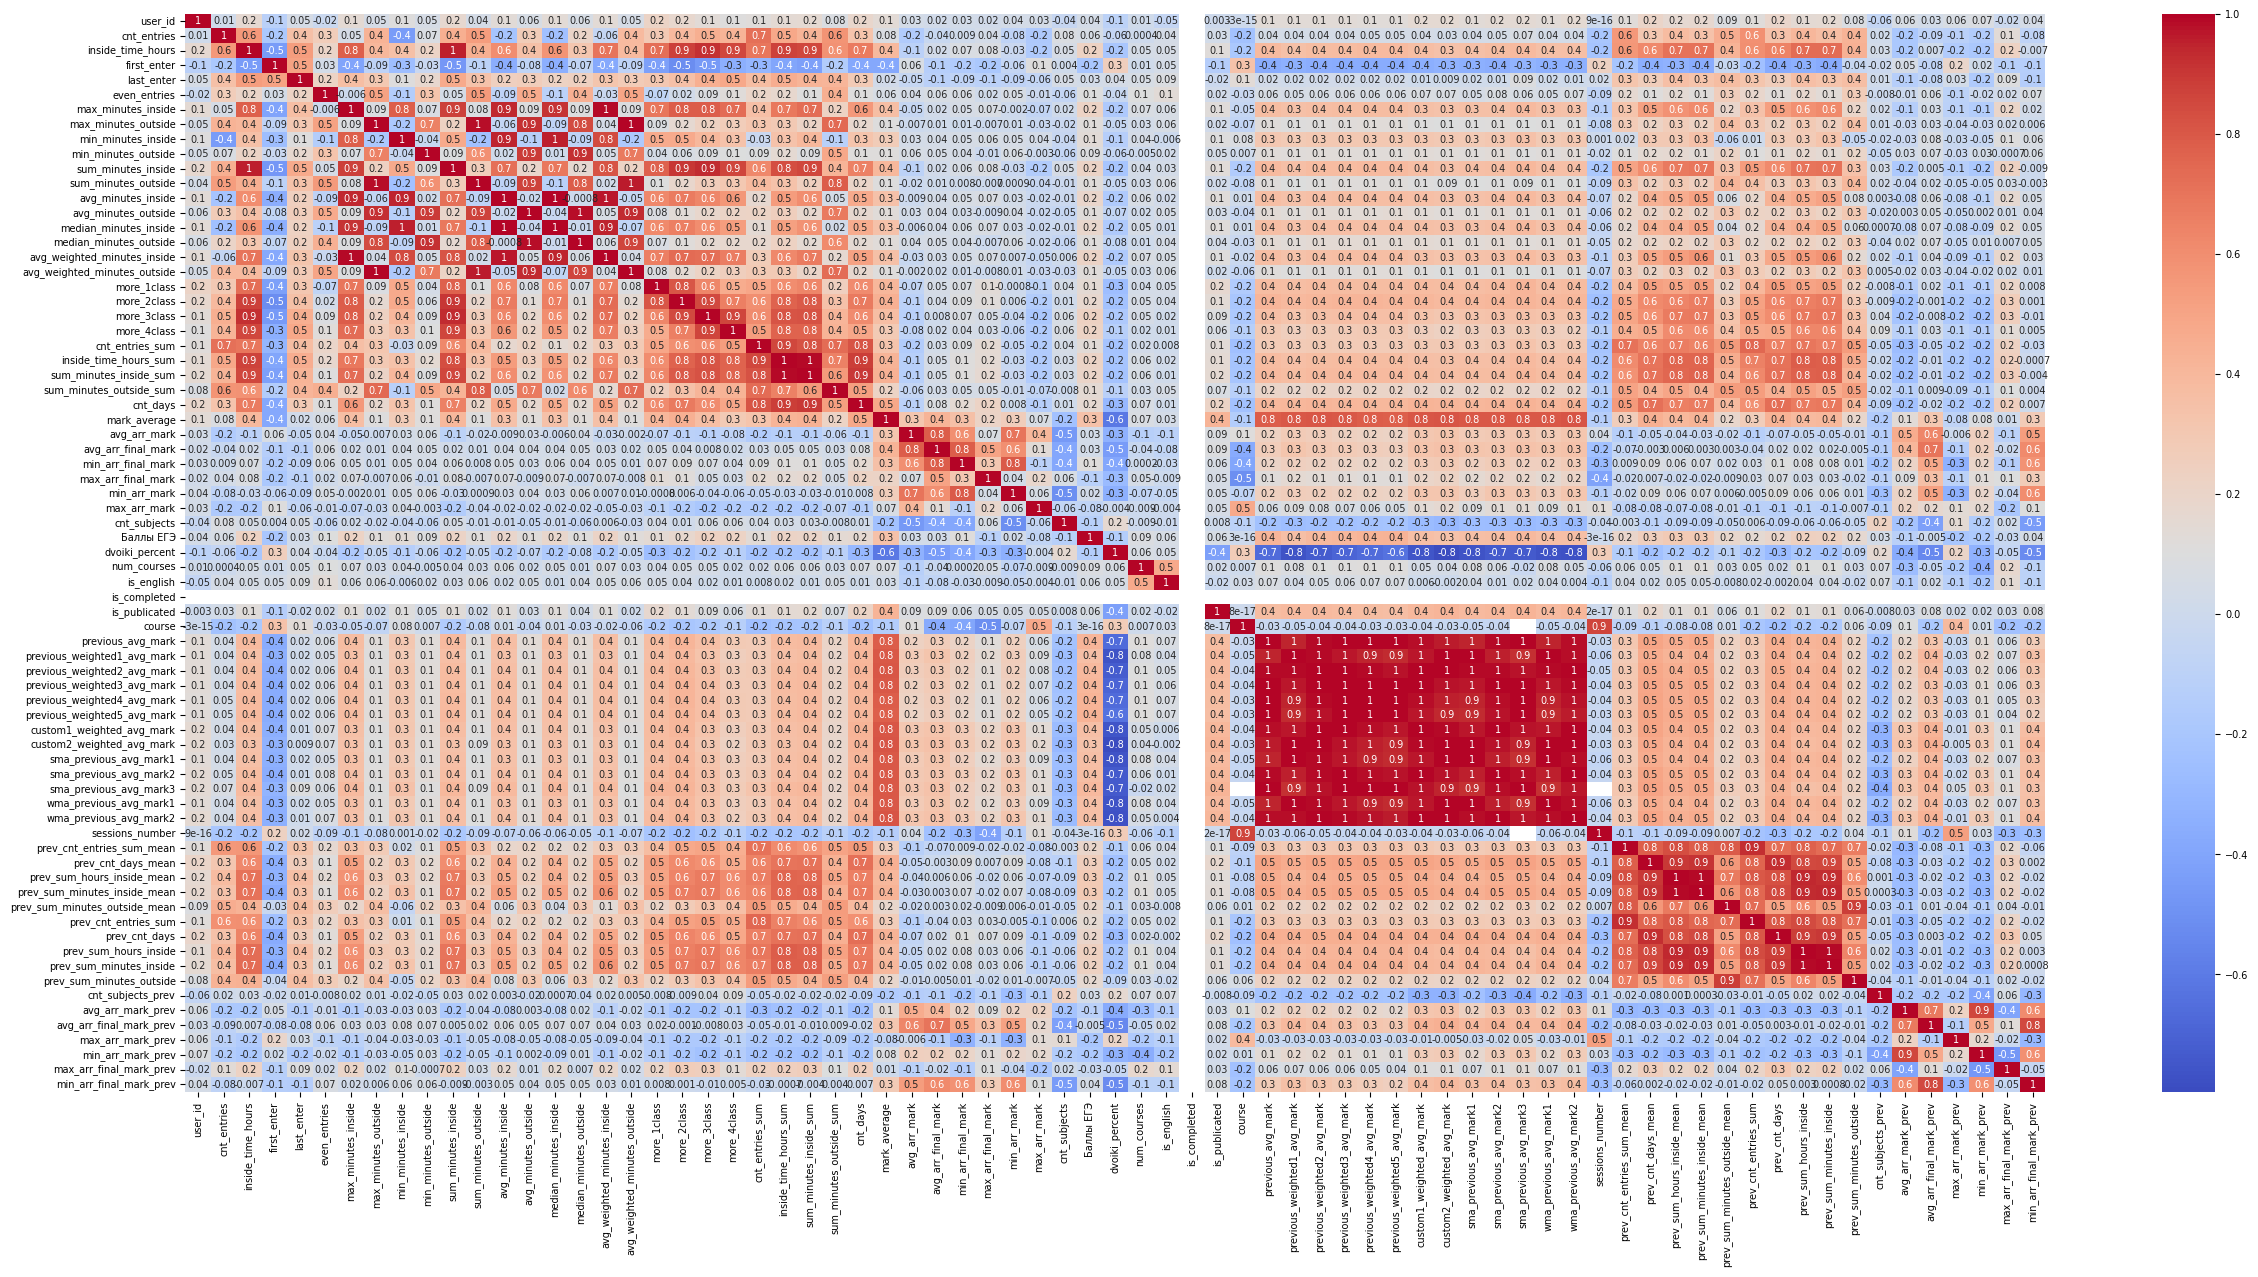

In [160]:
import seaborn as sns
import matplotlib

matplotlib.rc('font', size = 7)
plt.figure(figsize = (30, 14))
sns.heatmap(dataset.drop(['faculty', 'group', 'group_number', 'institute', 'semester', 'Призер олимпиад', 'Источник финансирования', 'Пол', 'is_dormitory', 'is_russian', 'lgota'], axis = 1).corr(), annot = True, fmt = '.1g', cmap = 'coolwarm')
plt.show()

# Деление на тест и валидацию

In [161]:
X_test = dataset.drop_duplicates(subset = 'user_id', keep = 'last')
y_test = X_test['mark_average']
X_test = X_test.drop(['mark_average'], axis = 1)

test_indices = X_test.index

X_train = dataset.drop(test_indices)
y_train = X_train['mark_average']
X_train = X_train.drop(['mark_average'], axis = 1)

X_test, X_train = X_test.drop(['user_id'], axis = 1), X_train.drop(['user_id'], axis = 1)


test_indices = np.array(X_test.index.tolist())
np.random.shuffle(test_indices)

val_indices = test_indices[:len(test_indices) // 2]
test_indices = test_indices[len(test_indices) // 2:]

X_val = X_test.loc[val_indices]
y_val = y_test.loc[val_indices]

X_test = X_test.loc[test_indices]
y_test = y_test.loc[test_indices]


le_financing = LabelEncoder().fit(X_train['Призер олимпиад'])
X_train['Призер олимпиад'] = le_financing.transform(X_train['Призер олимпиад'])
X_test['Призер олимпиад'] = le_financing.transform(X_test['Призер олимпиад'])
X_val['Призер олимпиад'] = le_financing.transform(X_val['Призер олимпиад'])

le_olymp = LabelEncoder().fit(X_train['Источник финансирования'])
X_train['Источник финансирования'] = le_olymp.transform(X_train['Источник финансирования'])
X_test['Источник финансирования'] = le_olymp.transform(X_test['Источник финансирования'])
X_val['Источник финансирования'] = le_olymp.transform(X_val['Источник финансирования'])

le_is_english = LabelEncoder().fit(X_train['is_english'])
X_train['is_english'] = le_is_english.transform(X_train['is_english'])
X_test['is_english'] = le_is_english.transform(X_test['is_english'])
X_val['is_english'] = le_is_english.transform(X_val['is_english'])

le_is_completed = LabelEncoder().fit(X_train['is_completed'])
X_train['is_completed'] = le_is_completed.transform(X_train['is_completed'])
X_test['is_completed'] = le_is_completed.transform(X_test['is_completed'])
X_val['is_completed'] = le_is_completed.transform(X_val['is_completed'])

le_sex = LabelEncoder().fit(X_train['Пол'])
X_train['Пол'] = le_sex.transform(X_train['Пол'])
X_test['Пол'] = le_sex.transform(X_test['Пол'])
X_val['Пол'] = le_sex.transform(X_val['Пол'])

le_is_dormitory = LabelEncoder().fit(X_train['is_dormitory'])
X_train['is_dormitory'] = le_is_dormitory.transform(X_train['is_dormitory'])
X_test['is_dormitory'] = le_is_dormitory.transform(X_test['is_dormitory'])
X_val['is_dormitory'] = le_is_dormitory.transform(X_val['is_dormitory'])

le_is_russian = LabelEncoder().fit(X_train['is_russian'])
X_train['is_russian'] = le_is_russian.transform(X_train['is_russian'])
X_test['is_russian'] = le_is_russian.transform(X_test['is_russian'])
X_val['is_russian'] = le_is_russian.transform(X_val['is_russian'])

le_lgota = LabelEncoder().fit(X_train['lgota'])
X_train['lgota'] = le_lgota.transform(X_train['lgota'])
X_test['lgota'] = le_lgota.transform(X_test['lgota'])
X_val['lgota'] = le_lgota.transform(X_val['lgota'])

# Модель

### catboost

In [162]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [167]:
cb = CatBoostRegressor(iterations = 1500,
                          verbose = 100,
                          # learning_rate = 0.01,
                          max_depth = 8,
                          l2_leaf_reg = 0.001,
                          loss_function = 'RMSE',
                          eval_metric = 'R2',
                          random_seed = 42)

# objective: RMSE
# max_depth: 8
# l2_leaf_reg: 0.001
# iterations: 1500
# random_seed: 42

cb.fit(X_train, y_train, eval_set = (X_val, y_val), cat_features = ['faculty', 'group', 'group_number', 'institute', 'semester',
                                                                     'is_completed', 'is_english', 'Источник финансирования', 'Призер олимпиад',
                                                                       'is_dormitory', 'is_russian', 'lgota']) # 'Источник финансирования', 'Призер олимпиад'])

preds = cb.predict(X_test)
print(f'MSE: {mse(y_test, preds)}')
print(f'MAE: {mae(y_test, preds)}')
print(f'RMSE: {mse(y_test, preds, squared = False)}')
print(f'R2-score: {r2_score(y_test, preds)}')

0:	learn: 0.0311208	test: -0.0454027	best: -0.0454027 (0)	total: 5.2ms	remaining: 7.79s
100:	learn: 0.7975615	test: 0.7022344	best: 0.7022344 (100)	total: 985ms	remaining: 13.6s
200:	learn: 0.8615970	test: 0.7303140	best: 0.7303140 (200)	total: 1.93s	remaining: 12.4s
300:	learn: 0.8955714	test: 0.7355301	best: 0.7357938 (283)	total: 2.88s	remaining: 11.5s
400:	learn: 0.9199610	test: 0.7397340	best: 0.7398461 (397)	total: 3.84s	remaining: 10.5s
500:	learn: 0.9391941	test: 0.7410057	best: 0.7415099 (473)	total: 4.79s	remaining: 9.56s
600:	learn: 0.9525872	test: 0.7428987	best: 0.7428987 (600)	total: 5.75s	remaining: 8.6s
700:	learn: 0.9628980	test: 0.7426122	best: 0.7431094 (641)	total: 6.68s	remaining: 7.62s
800:	learn: 0.9699822	test: 0.7432362	best: 0.7434530 (793)	total: 7.63s	remaining: 6.66s
900:	learn: 0.9762437	test: 0.7431201	best: 0.7434530 (793)	total: 8.57s	remaining: 5.7s
1000:	learn: 0.9806093	test: 0.7429391	best: 0.7434530 (793)	total: 9.51s	remaining: 4.74s
1100:	learn: 

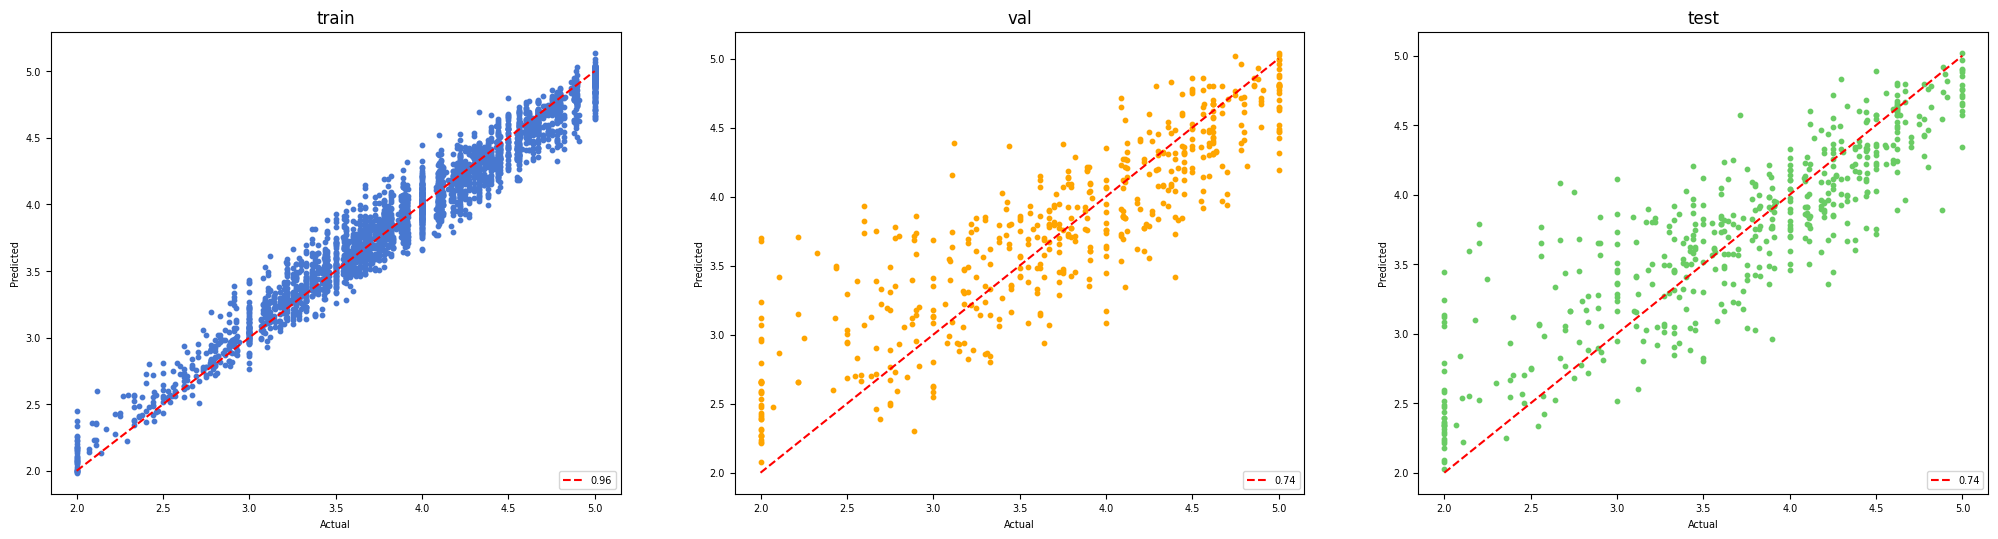

In [168]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(25, 6)

t_pred_train, t_pred_val, t_pred_test = cb.predict(X_train), cb.predict(X_val), cb.predict(X_test)
axes[0].scatter(y_train, t_pred_train, s = 10, c = 'b')
axes[1].scatter(y_val, t_pred_val, s = 10, c = 'orange')
axes[2].scatter(y_test, t_pred_test, s = 10, c = 'g')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'red', linestyle = '--', label = round(r2_score(y_train, t_pred_train), 2))
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color = 'red', linestyle = '--', label = round(r2_score(y_val, t_pred_val), 2))
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--', label = round(r2_score(y_test, t_pred_test), 2))
axes[0].set_title('train', fontsize = 12)
axes[1].set_title('val', fontsize = 12)
axes[2].set_title('test', fontsize = 12)
axes[0].legend(loc = 'lower right')
axes[1].legend(loc = 'lower right')
axes[2].legend(loc = 'lower right')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')

plt.show()

# Распределение таргета

<Axes: >

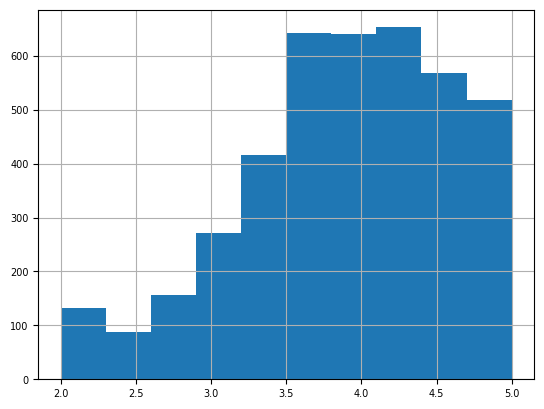

In [55]:
dataset['mark_average'].hist()

# Важность признаков

['dvoiki_percent' 'avg_arr_final_mark' 'is_publicated' 'Баллы ЕГЭ'
 'cnt_subjects' 'cnt_days' 'first_enter' 'sum_minutes_inside_sum'
 'faculty' 'previous_weighted2_avg_mark' 'previous_weighted3_avg_mark'
 'group' 'wma_previous_avg_mark1' 'inside_time_hours_sum' 'more_2class'
 'avg_arr_mark' 'institute' 'group_number' 'Источник финансирования'
 'sma_previous_avg_mark1']


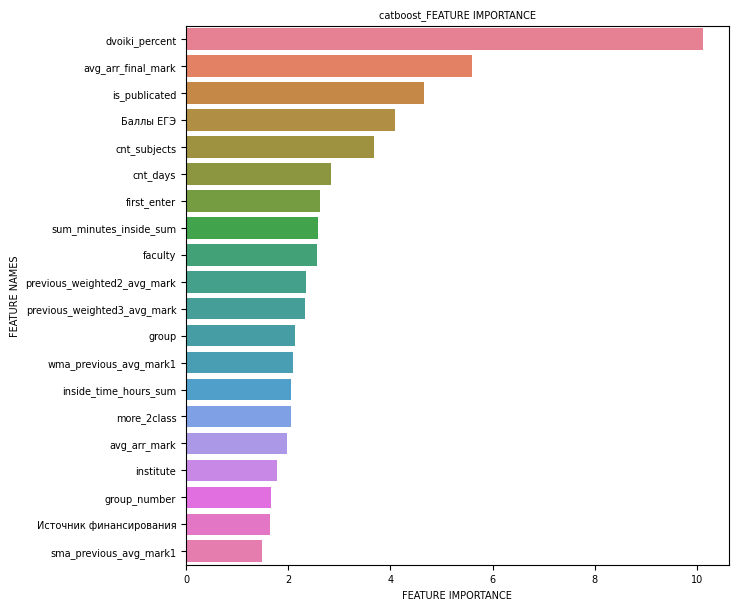

In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes("muted")

def plot_feature_importance(importance,names,model_type, top = 50):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    # plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:top], y=fi_df['feature_names'][:top], palette = "husl")
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    print(fi_df['feature_names'][:top].values)
    return fi_df

plt.figure(figsize=(7, 7))
sns.set_context(rc={"font.size":7,"axes.titlesize":7,"axes.labelsize":7})
fdf = plot_feature_importance(cb.feature_importances_, X_train.columns, 'catboost_', 20)

# Подбор гиперпараметров для модели

In [166]:
import optuna

def objective(trial):

    train_x, valid_x, train_y, valid_y = X_train, X_val, y_train, y_val

    param = {
        
        "objective": trial.suggest_categorical("objective", ["RMSE", "MAPE"]),
        "max_depth": trial.suggest_int("max_depth", 1, 8),
        "l2_leaf_reg": trial.suggest_categorical("l2_leaf_reg", [1e-5, 1e-4, 1e-3, 1e-2]),
        "iterations": trial.suggest_categorical("iterations", [1000, 1500]),
        "random_seed": trial.suggest_categorical("random_seed", [42]),
        "used_ram_limit": "3gb"
    }

    gbm = CatBoostRegressor(**param)

    gbm.fit(train_x, train_y, eval_set = [(valid_x, valid_y)], verbose = 0, early_stopping_rounds = 100, cat_features = ['faculty', 'group', 'group_number', 'institute', 'semester',
                                                                     'is_completed', 'is_english', 'Источник финансирования', 'Призер олимпиад',
                                                                       'is_dormitory', 'is_russian', 'lgota'])

    preds = gbm.predict(valid_x)
    r2 = r2_score(valid_y, preds)
    return r2


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100, timeout = 600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-08-02 14:27:57,845] A new study created in memory with name: no-name-857b52a3-b6d2-4908-a180-1006a8ea432a
[I 2024-08-02 14:28:00,260] Trial 0 finished with value: 0.735114194076421 and parameters: {'objective': 'RMSE', 'max_depth': 5, 'l2_leaf_reg': 0.0001, 'iterations': 1000, 'random_seed': 42}. Best is trial 0 with value: 0.735114194076421.
[I 2024-08-02 14:28:03,220] Trial 1 finished with value: 0.7329667031213623 and parameters: {'objective': 'RMSE', 'max_depth': 7, 'l2_leaf_reg': 0.001, 'iterations': 1500, 'random_seed': 42}. Best is trial 0 with value: 0.735114194076421.
[I 2024-08-02 14:28:03,585] Trial 2 finished with value: 0.6885080637262481 and parameters: {'objective': 'RMSE', 'max_depth': 1, 'l2_leaf_reg': 0.01, 'iterations': 1500, 'random_seed': 42}. Best is trial 0 with value: 0.735114194076421.
[I 2024-08-02 14:28:06,512] Trial 3 finished with value: 0.7329667031213623 and parameters: {'objective': 'RMSE', 'max_depth': 7, 'l2_leaf_reg': 0.001, 'iterations': 1500

Number of finished trials: 100
Best trial:
  Value: 0.7434530275807533
  Params: 
    objective: RMSE
    max_depth: 8
    l2_leaf_reg: 0.001
    iterations: 1500
    random_seed: 42


# LightGBM

class lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)

In [170]:
from lightgbm import LGBMRegressor

In [171]:
def change_types(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

X_train, X_val, X_test = change_types(X_train), change_types(X_val), change_types(X_test)

In [172]:
lgbm = LGBMRegressor(max_depth = 5,
                     n_estimators = 200,
                     reg_alpha = 0.001,
                     random_state = 42,
                     verbose = -1)

# max_depth: 1
# reg_alpha: 0.0001
# n_estimators: 800
# random_state: 42
# verbose: -1

# max_depth: 5
# reg_alpha: 0.001
# n_estimators: 200
# random_state: 42
# verbose: -1

lgbm.fit(X_train, y_train, eval_set = (X_val, y_val), categorical_feature = ['faculty', 'group', 'group_number', 'institute', 'semester', 'Источник финансирования', 'Призер олимпиад'])

preds = lgbm.predict(X_test)
print(f'MSE: {mse(y_test, preds)}')
print(f'MAE: {mae(y_test, preds)}')
print(f'RMSE: {mse(y_test, preds, squared = False)}')
print(f'R2-score: {r2_score(y_test, preds)}')

MSE: 0.17640791810785336
MAE: 0.3199072460506912
RMSE: 0.42000942621309506
R2-score: 0.7279956488645125


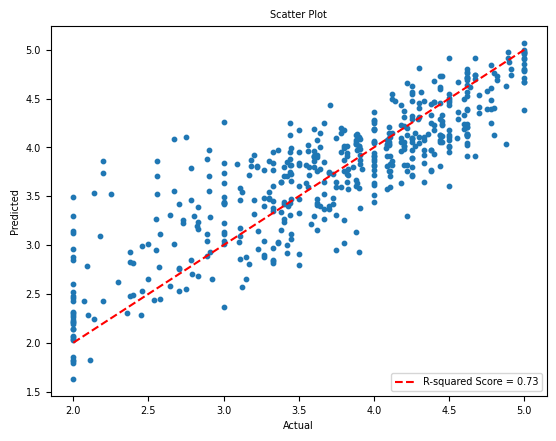

In [173]:
plt.figure(3)
t_true, t_pred = y_test, preds
plt.scatter(t_true, t_pred, s = 10)
plt.plot([t_true.min(), t_true.max()], [t_true.min(), t_true.max()], color = 'red', label = 'R-squared Score = %0.2f' % r2_score(t_true, t_pred), linestyle = '--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot')
plt.legend(loc='lower right')

In [237]:
import optuna

def objective(trial):

    train_x, valid_x, train_y, valid_y = X_train, X_val, y_train, y_val

    param = {
        "max_depth": trial.suggest_int("max_depth", 1, 8),
        "reg_alpha": trial.suggest_categorical("reg_alpha", [1e-5, 1e-4, 1e-3]),
        "n_estimators": trial.suggest_categorical("n_estimators", [i for i in range(100, 1001, 100)]),
        "random_state": trial.suggest_categorical("random_state", [42]),
        "verbose": trial.suggest_categorical("verbose", [-1]),
    }

    gbm = LGBMRegressor(**param)

    gbm.fit(train_x, train_y, eval_set = [(valid_x, valid_y)], categorical_feature = ['faculty', 'group', 'group_number', 'institute', 'semester', 'Источник финансирования', 'Призер олимпиад'])

    preds = gbm.predict(valid_x)
    r2 = r2_score(valid_y, preds)
    return r2


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100, timeout = 600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-06-25 15:36:31,036] A new study created in memory with name: no-name-76707dc1-dc85-47eb-98a5-f2c8e3cdbd21
[I 2024-06-25 15:36:33,081] Trial 0 finished with value: 0.6869840718690159 and parameters: {'max_depth': 8, 'reg_alpha': 0.001, 'n_estimators': 700, 'random_state': 42, 'verbose': -1}. Best is trial 0 with value: 0.6869840718690159.
[I 2024-06-25 15:36:33,159] Trial 1 finished with value: 0.6862463635040137 and parameters: {'max_depth': 2, 'reg_alpha': 0.0001, 'n_estimators': 100, 'random_state': 42, 'verbose': -1}. Best is trial 0 with value: 0.6869840718690159.
[I 2024-06-25 15:36:34,811] Trial 2 finished with value: 0.689770811997813 and parameters: {'max_depth': 6, 'reg_alpha': 0.001, 'n_estimators': 700, 'random_state': 42, 'verbose': -1}. Best is trial 2 with value: 0.689770811997813.
[I 2024-06-25 15:36:37,208] Trial 3 finished with value: 0.680848261084922 and parameters: {'max_depth': 7, 'reg_alpha': 0.001, 'n_estimators': 900, 'random_state': 42, 'verbose': -1}. 

Number of finished trials: 100
Best trial:
  Value: 0.7005845427931772
  Params: 
    max_depth: 5
    reg_alpha: 0.001
    n_estimators: 200
    random_state: 42
    verbose: -1
